#Loading and processing the data

In [1]:
import pandas as pd
df = pd.read_csv('/orbit - orbit.csv')
print(df.head())
df.info()
df.isnull().sum()

   time_steps           y
0  -10.000000  100.000000
1   -9.989995   99.800000
2   -9.979990   99.600200
3   -9.969985   99.400601
4   -9.959980   99.201201
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time_steps  2000 non-null   float64
 1   y           2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


,0
time_steps,0
y,0


#Plotting the data

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

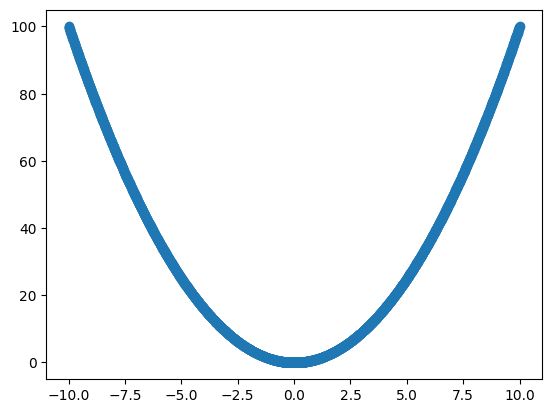

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df['time_steps'], df['y'])
plt

#splitting the data

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['time_steps'],df['y'],test_size=0.2)

#creating the polynomial features

In [21]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
#expanding x since it one dimen
x_train_array = np.array(x_train)
x_test_array = np.array(x_test)

#print(x_train_expand.shape)
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train_array.reshape(-1,1))
x_test_poly = poly.fit_transform(x_test_array.reshape(-1,1))

#creating, compiling and training the model


In [22]:
from keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units = 1,input_dim = x_train_poly.shape[1]))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train_poly,y_train,epochs=100,batch_size=32)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4363.1875
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3029.2021
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1809.4435 
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1303.8271
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 1082.2095
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 972.0998
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 847.7648
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 707.8077 
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 679.0858 
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 550.3203
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 487.8259 
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 431.8452 
Epoch 13/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 353.3497
Epoch 14/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 319.6566 
Epoch 15/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s

#making predictions and plotting them

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


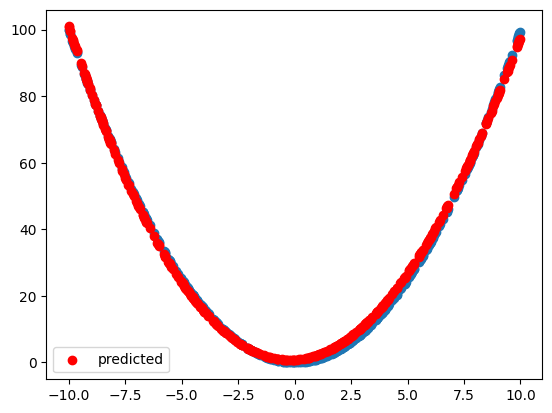

In [23]:
y_pred = model.predict(x_test_poly)
plt.scatter(x_test, y_test)
plt.scatter(x_test,y_pred,label='predicted',color='red')
plt.legend()
plt.show()


#evaluating the model

In [24]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)

print(f'R2 Score: {r2}')

R2 Score: 0.9986515165517281
